<a href="https://colab.research.google.com/github/Galzi1/DataDiscoveryNNProj/blob/master/project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will prepare data and run several algorithms for classification

In [ ]:
# Submitting:
# Gal Ziv, ID: 205564198
# Moshe Haziza, ID: 336411913

# 1. Imports

In [46]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. data preperation

In [47]:
# data = pd.read_csv("data/adult.data", header = None)
data = pd.read_csv("https://raw.githubusercontent.com/Galzi1/DataDiscoveryNNProj/master/data/adult.data", header = None)
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols

## 2.1 Categorical feature handling
* Name two machine learning algorithms that can deal with categorical features without special handling?

special handling = one hot encoding exc..

#### YOUR VERBAL SOLUTION HERE
* Naive Bayes
* Decision Tree


#### END YOUR VERBAL SOLUTION HERE

## 2.2 One hot encoding 

* Remove the y column from the data variable and save it to the variable y
* Transform the categorical columns to one hot encoding

You may find get_dummies function in pandas useful

In [104]:
### YOUR CODE HERE
y = data['y']
X = data.drop(['y'], axis=1)

obj_cols = list(X.select_dtypes(include=['object']).columns)

X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

### END YOUR CODE

## 2.3 Train test split

* Convert the y column - replace <=50K with 0 and >50K with 1 
* Split the dataset into train and test set (use 15% for the test set)

at the end, make sure you have the following variables:

* X
* y
* X_train
* X_test
* y_train
* y_test

You may find sklearn train_test_split useful

In [49]:
### YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)




### END YOUR CODE

## 2.3 Numeric feature normalization

* Scale the numeric features to to have zero mean (z score normalization)

- Don't scale the boolean features

You may find sklearn StandardScaler useful

In [50]:
### YOUR CODE HERE
from sklearn import preprocessing

int_cols = list(X.select_dtypes(include=['int64']).columns)

X_train[int_cols] = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train[int_cols])
X_test[int_cols] = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test[int_cols])


### END YOUR CODE


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

# 3 Models

Create a function `cv(x, y, model)` (cv stands for cross validation) that gets a model (sklearn classifier) and the data.  
The function should fit the model using k fold cross validation with k = 5, and print the 'roc_auc' on each fold (which is the scoring parameter for the cross val_score function).


[Computing cross-validated metrics](https://scikit-learn.org/stable/modules/cross_validation.html)


In [9]:
## YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

def cv(x, y, model):
  scoring = ['roc_auc']
  scores = cross_validate(model, x, y, scoring=scoring)
  print(scores['test_roc_auc'])
  return scores['test_roc_auc']




## END YOUR CODE

## 3.1 Baseline model - logistic regression
Our first algorithm will be logistic regression, since it's always nice to know how well can we do with a simple algorithm.
* Should we use class_weight = 'balanced' in sklearn logistic regression? why?
* Check how the results differ with and without the 'balanced' parameter - use `cv(x, y, model)` for that purpose, explain your answer
* Fit a model on X_train, y_train and plot the precision recall curve on the test data.
* If we would plot this curve on each fold (of the 5 folds in the cross validation), would we get exactly the same plot?

Do not change other hyperparameters

[precision recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.59166527 0.57622438 0.58222977 0.56844593 0.60851447]
Average roc-auc on LogisticRegression = 0.5854159651072461


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


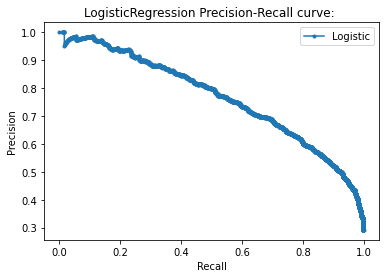

[0.67854476 0.87181471 0.67400446 0.66862456 0.77641163]
Average roc-auc on LogisticRegression with balanced class weights = 0.7338800245065463


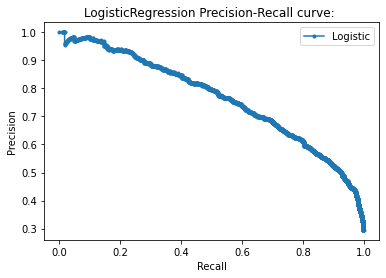

In [10]:
## YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
import statistics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

lr = LogisticRegression()
lr_scoring = cv(X, y, lr)
print(f'Average roc-auc on LogisticRegression = {statistics.mean(lr_scoring)}')

lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.title('LogisticRegression Precision-Recall curve: ')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


lr_balanced = LogisticRegression(class_weight='balanced', max_iter=300)
lr_balanced_scoring = cv(X, y, lr_balanced)
print(f'Average roc-auc on LogisticRegression with balanced class weights = {statistics.mean(lr_balanced_scoring)}')

lr_balanced.fit(X_train, y_train)
lr_probs = lr_balanced.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.title('LogisticRegression Precision-Recall curve: ')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
1 . Yes, the roc-auc was much better when using 'balanced' class weights

4 . No. The plots would probably be very similar but not identical, as the training and validation subsets are different in each iteration of cross-validation.



#### END YOUR VERBAL SOLUTION HERE

## 3.2 ANN
ANN (MLPClassifier in sklearn):

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters

In [13]:
### YOUR CODE HERE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, log_loss

ann = MLPClassifier().fit(X_train, y_train)

ann_pred_train = ann.predict(X_train)
ann_auc_train = roc_auc_score(y_train, ann_pred_train)
print(f'ANN AUC on train data = {ann_auc_train}')
ann_logloss_train = log_loss(y_train, ann_pred_train)
print(f'ANN Log-Loss on train data = {ann_logloss_train}')

ann_pred_test = ann.predict(X_test)
ann_auc_test = roc_auc_score(y_test, ann_pred_test)
print(f'ANN AUC on test data = {ann_auc_test}')
ann_logloss_test = log_loss(y_test, ann_pred_test)
print(f'ANN Log-Loss on test data = {ann_logloss_test}')


### END YOUR CODE

ANN AUC on train data = 0.84984219223955
ANN Log-Loss on train data = 3.3083923050887445
ANN AUC on test data = 0.7615157728187891
ANN Log-Loss on test data = 5.571506340220586


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### YOUR VERBAL SOLUTION HERE
Yes, this model's results are better than the baseline (logistic regression), based on the metrics that we were instructed to use.
Logistic regression's best roc-auc was 0.7338800245065463 (with balanced class-weights), and ANN's roc-auc on the test data is 0.7615157728187891.


#### END YOUR VERBAL SOLUTION HERE

## 3.3 Random forest
Random Forest classifier:

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters


In [15]:
### YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred_train = rf.predict(X_train)
rf_auc_train = roc_auc_score(y_train, rf_pred_train)
print(f'Random Forest AUC on train data = {rf_auc_train}')
rf_logloss_train = log_loss(y_train, rf_pred_train)
print(f'Random Forest Log-Loss on train data = {rf_logloss_train}')

rf_pred_test = rf.predict(X_test)
rf_auc_test = roc_auc_score(y_test, rf_pred_test)
print(f'Random Forest AUC on test data = {rf_auc_test}')
rf_logloss_test = log_loss(y_test, rf_pred_test)
print(f'Random Forest Log-Loss on test data = {rf_logloss_test}')







### END YOUR CODE

Random Forest AUC on train data = 0.9999246306903828
Random Forest Log-Loss on train data = 0.0012479685068267931
Random Forest AUC on test data = 0.7749409485090821
Random Forest Log-Loss on test data = 5.104853480049528


#### YOUR VERBAL SOLUTION HERE
Yes, this model's results are better than the baseline (logistic regression), based on the metrics that we were instructed to use.
Logistic regression's best roc-auc was 0.7338800245065463 (with balanced class-weights), and Random Forest's roc-auc on the test data is 0.7749409485090821.


#### END YOUR VERBAL SOLUTION HERE

## 3.4 Confusion matrix
Plot/print the confusion matrix of the random forest model on the test data

Explain shortly your results

Confusion matrix on Random Forest
[[3377  326]
 [ 508  674]]


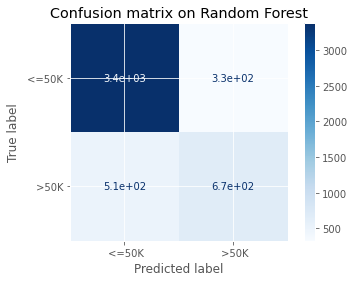

In [114]:
### YOUR CODE HERE
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=data['y'].unique(),
                              cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix on Random Forest")

print("Confusion matrix on Random Forest")
print(disp.confusion_matrix)

plt.show()


### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
As we see we have very large proportion of truely predicted values for class '<=50K', followed by a small proportion of truely predicted values for class '>50K'.
Compared to these the proportions of the false positives and false negatives are relatively small (again - good!).
We can see as well that more false predictions were on class '<=50K' than on '>50K', which may, when comparing with what we see in the top left corner of the table, suggests that our model is slightly biased into predicting '<=50K' label rather than '>50K' - makes sense when the classes are so imbalanced.


#### END YOUR VERBAL SOLUTION HERE

## 3.5 Global feature importance of the random forest and SHAP

* Plot the global feature importance of the features - use SHAP for this purpsose
* Choose two samples from the dataset and plot/print the local explanations for this samples. Explain which features
are important
* Explain in few words how this feature importance is calculated

**SHAP can be very slow on the random forest model. Thus, train another model with shallow trees (depth <7 for example) and you can also compute the SHAP values on a small data set. If it is yet very slow you, try to fit a different classifier for this purpose (MLP for example or GradientBoostingClassifier). You can also discard the binary features (which derived from the categorical features) for this purpose and stay only with the numerical ones.**


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


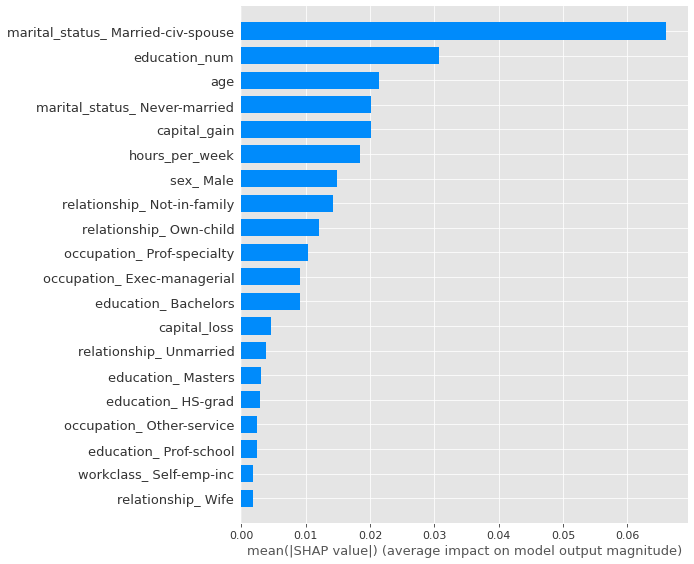

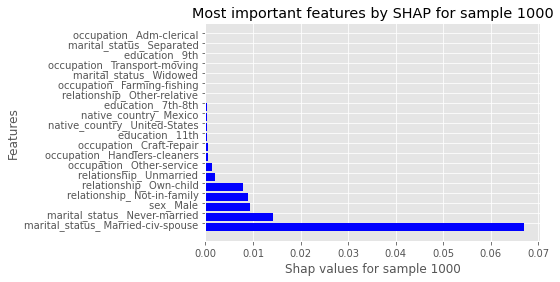

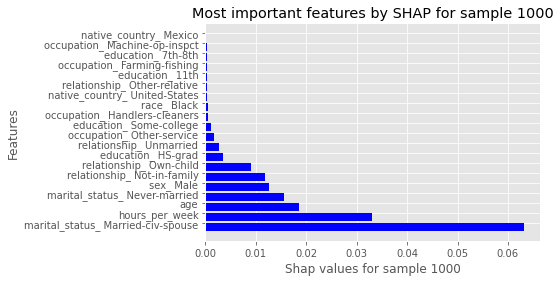

In [103]:
### YOUR CODE HERE
!pip install shap
import shap
from sklearn.ensemble import RandomForestClassifier

plt.style.use('ggplot')
shap.initjs()

rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

X_importance = X_test
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_importance)

shap.summary_plot(shap_values[1], X_importance, plot_type='bar')

# Choosing two arbitrary samples - 1000 and 2567
features_names = X_importance.columns
sample1_shap_values = shap_values[1][1000]

zipped = list(zip(sample1_shap_values, features_names))
zipped.sort(reverse=True)
zipped = zipped[:20]
sample1_x, sample1_y = zip(*zipped)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(sample1_x))  # the x locations for the groups
ax.barh(ind, sample1_x, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(sample1_y, minor=False)
plt.title('Most important features by SHAP for sample 1000')
plt.xlabel('Shap values for sample 1000')
plt.ylabel('Features') 

plt.show()

sample2_shap_values = shap_values[1][2567]

zipped = list(zip(sample2_shap_values, features_names))
zipped.sort(reverse=True)
zipped = zipped[:20]
sample2_x, sample2_y = zip(*zipped)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(sample2_x))  # the x locations for the groups
ax.barh(ind, sample2_x, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(sample2_y, minor=False)
plt.title('Most important features by SHAP for sample 1000')
plt.xlabel('Shap values for sample 1000')
plt.ylabel('Features') 

plt.show()

### END YOUR CODE

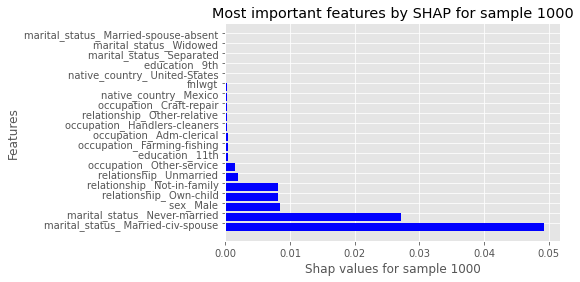

In [102]:
zipped = list(zip(sample1_shap_values, features_names))
zipped.sort(reverse=True)
zipped = zipped[:20]
sample1_x, sample1_y = zip(*zipped)
# plt.bar(sample1_x, sample1_y)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(sample1_x))  # the x locations for the groups
ax.barh(ind, sample1_x, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(sample1_y, minor=False)
plt.title('Most important features by SHAP for sample 1000')
plt.xlabel('Shap values for sample 1000')
plt.ylabel('Features') 

plt.show()

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 4 Clustering
Imagine that we don't really know the true labels -> we need to use unsupervised machine learning.

* Perform k means on X_train with k = 2. Is our clusters represent rich and poor people (does one cluster represent 'rich' ('>= 50k') people and the other 'poor' people)?

* Do the same with dbscan, understand how many clusters did you get and the proportion of 'rich' and 'poor' people in each cluster.

* Plot the clusters using pca (only for the kmeans). Are they seperated in the PCA dimension?
 
This question is more open minded and you can (recomended) use graphs that explain how well did the clustering work. Did it work well?? 

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

KeyboardInterrupt: ignored

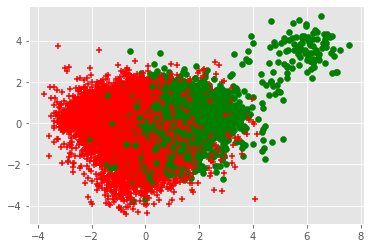

In [117]:
import pylab as pl

for i in range (0, pca_2d.shape[0]):
  if y_train[i] == 0:
    c1 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
  else:
    c2 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')

pl.legend([c1, c2], ['<=50K', '>50K'])
pl.title('Known outcomes')
pl.show()

In [ ]:
groups = data.groupby('y')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(pca_2d[:,], pca_2d[, :], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

SyntaxError: ignored

In [ ]:
import pylab as pl

c1 = list()
c2 = list()

for i in range (0, pca_2d.shape[0]):
  print(i)
  if y_train[i] == 0:
    c1.append(pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+'))
  else:
    c2.append(pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o'))

pl.legend([c1, c2], ['<=50K', '>50K'])
pl.title('Known outcomes')
pl.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

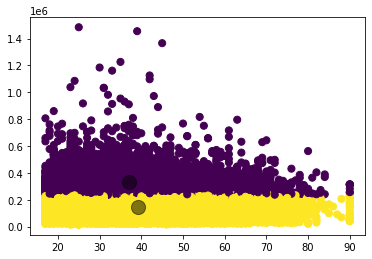

In [ ]:
### YOUR CODE HERE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
centroids = kmeans.cluster_centers_

plt.scatter(X_train, X_train.iloc[:, 1], c=labels, s=50, cmap='viridis')


plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE